# **Quantium's Virtual Internship  - TASK 2**

First of all let us understand the problem statement:

  *  A dataset of a retail store has been given, The dataset consits of various factores like Loyalty Card Number, Date, Store Number, Transaction ID, Product Number, Product Name, Product Quantity, Total Sales, Pack Size, Brand, LifeStage, Premium Customers.


  *   So the retail store has launched New Trial Stores with an new layout ==> **77,86,88**.

  *  The Task is to find is trial store has made many impact on the customers shopping and total number of sales. The trial store period starts from February **2018 to April 2019.**

  *  With the given data we need to get the total number of Customers visited in Trial Stores, Control Stores, Other Stores and Total number of Products sold in Trial, Contol, Other Stores 

  *  To find the control stores we need to get the **highest correlation** to the trial store, In such way we can get a trial store.


# **Finding the Control Store**

### **Importing Libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
from dateutil.rrule import rrule, DAILY
import numpy as np
import re
import math

%matplotlib inline
plt.rcParams['figure.figsize'] = (18,6)
pd.pandas.set_option('display.max_columns',None)

In [2]:
df = pd.read_csv("QVI_data.csv")
df.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream


### **Exploratory Data Analysis**

In [3]:
df.shape

(264834, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264834 entries, 0 to 264833
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   LYLTY_CARD_NBR    264834 non-null  int64  
 1   DATE              264834 non-null  object 
 2   STORE_NBR         264834 non-null  int64  
 3   TXN_ID            264834 non-null  int64  
 4   PROD_NBR          264834 non-null  int64  
 5   PROD_NAME         264834 non-null  object 
 6   PROD_QTY          264834 non-null  int64  
 7   TOT_SALES         264834 non-null  float64
 8   PACK_SIZE         264834 non-null  int64  
 9   BRAND             264834 non-null  object 
 10  LIFESTAGE         264834 non-null  object 
 11  PREMIUM_CUSTOMER  264834 non-null  object 
dtypes: float64(1), int64(6), object(5)
memory usage: 24.2+ MB


In [5]:
df.isnull().sum()

LYLTY_CARD_NBR      0
DATE                0
STORE_NBR           0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
PACK_SIZE           0
BRAND               0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

#####  **Adding a new month ID column in the data with the format yyyymm**

In [6]:
df["YM_ID"] = ["".join(x.split("-")[0:2]) for x in df["DATE"]]
df.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,YM_ID
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium,201810
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream,201809
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget,201903
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget,201903
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream,201811


**Calculating For each store and month calculate:**

  * Total Sales

  * Number of Customers

  * Transactions Per Customer 

  * Chips Per Customer 
  
  * Average Price Per Unit

In [7]:
total_sales = df.groupby(["STORE_NBR","YM_ID"])["TOT_SALES"].sum() # Total Sales

numb_cust = df.groupby(["STORE_NBR","YM_ID"])["LYLTY_CARD_NBR"].nunique() # Number of Customers

tnx_per_cust = df.groupby(["STORE_NBR","YM_ID"])["TXN_ID"].nunique() / numb_cust # Transaction per Customer

chips_per_cust = df.groupby(["STORE_NBR","YM_ID"])["PROD_QTY"].sum() / df.groupby(["STORE_NBR","YM_ID"])["TXN_ID"].nunique()  # Chips per Customer

avg_price_unit = df.groupby(["STORE_NBR","YM_ID"])["TOT_SALES"].sum() /  df.groupby(["STORE_NBR","YM_ID"])["PROD_QTY"].sum() # Average Price per Unit

##### **Creating a DataFrame measure**

In [8]:
store_month = [total_sales,numb_cust,tnx_per_cust, chips_per_cust, avg_price_unit]
measure = pd.concat(store_month, join = "outer", axis = 1)
measure.reset_index(inplace=True)
measure.head()

,STORE_NBR,YM_ID,TOT_SALES,LYLTY_CARD_NBR,0,1,2
0,1,201807,206.9,49,1.061224,1.192308,3.337097
1,1,201808,176.1,42,1.023810,1.255814,3.261111
2,1,201809,278.8,59,1.050847,1.209677,3.717333
3,1,201810,188.1,44,1.022727,1.288889,3.243103
4,1,201811,192.6,46,1.021739,1.212766,3.378947


In [9]:
measure.rename(columns={"STORE_NBR": "store_nbr", "YM_ID":"ym_id","TOT_SALES":"tot_sales","LYLTY_CARD_NBR": "customer",0:"tnx_per_cstm",1:"chips_per_cstm",2:"avg_price_unit"},inplace=True)
measure.head()

,store_nbr,ym_id,tot_sales,customer,tnx_per_cstm,chips_per_cstm,avg_price_unit
0,1,201807,206.9,49,1.061224,1.192308,3.337097
1,1,201808,176.1,42,1.023810,1.255814,3.261111
2,1,201809,278.8,59,1.050847,1.209677,3.717333
3,1,201810,188.1,44,1.022727,1.288889,3.243103
4,1,201811,192.6,46,1.021739,1.212766,3.378947


##### **Checking for incomplete observation**

In [10]:
incp_obs = pd.pivot_table(df, index = 'STORE_NBR', columns = 'YM_ID', values = 'TXN_ID', aggfunc = 'count')
incp_obs.isnull().sum()

YM_ID
201807    6
201808    9
201809    8
201810    7
201811    8
201812    9
201901    9
201902    8
201903    7
201904    7
201905    9
201906    8
dtype: int64

In [11]:
[index for index, row in incp_obs.iterrows() if row.isnull().any()]

[11, 31, 44, 76, 85, 92, 117, 193, 206, 211, 218, 252]

##### **Dropping the Incomplete Observation Stores from measure**

In [12]:
str_nbr = [11, 31, 44, 76, 85, 92, 117, 193, 206, 211, 218, 252]
measure = measure[~measure["store_nbr"].isin(str_nbr)]
measure.head()

,store_nbr,ym_id,tot_sales,customer,tnx_per_cstm,chips_per_cstm,avg_price_unit
0,1,201807,206.9,49,1.061224,1.192308,3.337097
1,1,201808,176.1,42,1.023810,1.255814,3.261111
2,1,201809,278.8,59,1.050847,1.209677,3.717333
3,1,201810,188.1,44,1.022727,1.288889,3.243103
4,1,201811,192.6,46,1.021739,1.212766,3.378947


#### **Selecting Pre-Trail Period** 

In [13]:
pretrial = measure[measure["ym_id"].between("201807", "201906", inclusive=False)]
pretrial.head()

,store_nbr,ym_id,tot_sales,customer,tnx_per_cstm,chips_per_cstm,avg_price_unit
1,1,201808,176.1,42,1.023810,1.255814,3.261111
2,1,201809,278.8,59,1.050847,1.209677,3.717333
3,1,201810,188.1,44,1.022727,1.288889,3.243103
4,1,201811,192.6,46,1.021739,1.212766,3.378947
5,1,201812,189.6,42,1.119048,1.212766,3.326316


##### **Creating Correlation for each stores**


*  Create a function to calculate correlation for a measure, looping through each control store.



In [14]:
def cal_corr(table, metric, trl_store, store):
  sample = pd.DataFrame({"Trail Store": [], "nStores": [], "Correlation": []})
  st = table.loc[table[store] == trl_store, metric]
  st.reset_index(drop = True, inplace = True)
  st_nbrs = table[store].unique()

  for a in st_nbrs:
    if a == trl_store:
      continue
    nstr = table.loc[table[store] == a, metric]
    nstr.reset_index(drop = True, inplace = True)
    sample = sample.append({"Trail Store": trl_store, "nStores": a, "Correlation": nstr.corr(st)}, ignore_index = True)
  return sample

##### **Calculating Standard Magnitude**

In [15]:
def cal_std_mag(table, metric, trl_store, store):
  mag= pd.DataFrame({"Trail Store": [], "nStores": [], "Magnitude": []})
  st = table.loc[table[store] == trl_store, metric]
  st.reset_index(drop = True, inplace = True)
  st_nbrs = table[store].unique()
 
  for a in st_nbrs:
    if a == trl_store:
      continue
    nstr = table.loc[table[store] == a, metric]
    nstr.reset_index(drop = True, inplace = True)
    std_mag = abs(st-nstr)
    magnit = np.mean(1-(std_mag-min(std_mag))/(max(std_mag)-min(std_mag)))
    mag = mag.append({"Trail Store": trl_store, "nStores": a, "Magnitude": magnit}, ignore_index = True)
  return mag

In [16]:
cor_sales = cal_corr(pretrial, "tot_sales", 77,"store_nbr")
mag_sales = cal_std_mag(pretrial, "tot_sales", 77,"store_nbr")

cor_customer  = cal_corr(pretrial, "customer", 77, "store_nbr")
mag_customer  = cal_std_mag(pretrial, "customer", 77, "store_nbr")

##### **Getting Total Sales Values**


In [17]:
comb_score = pd.merge(cor_sales,mag_sales[["Magnitude","nStores"]],on="nStores",how="right")
comb_score.head()

,Trail Store,nStores,Correlation,Magnitude
0,77.0,1.0,0.081674,0.372237
1,77.0,2.0,0.460638,0.563319
2,77.0,3.0,-0.070968,0.504915
3,77.0,4.0,-0.526915,0.540427
4,77.0,5.0,-0.518434,0.525756


Calculating the average measure

In [18]:
#0.5 is nothing but a threshold 
comb_score["avg_sales_measure"] = 0.5 * comb_score["Correlation"] + 0.5 * comb_score["Magnitude"]
Sales_avg_measure = comb_score.sort_values(by = "avg_sales_measure",ascending=False,ignore_index=True)
Sales_avg_measure.head()

,Trail Store,nStores,Correlation,Magnitude,avg_sales_measure
0,77.0,234.0,0.694867,0.560849,0.627858
1,77.0,233.0,0.576319,0.674778,0.625549
2,77.0,214.0,0.434062,0.725026,0.579544
3,77.0,35.0,0.900119,0.252830,0.576474
4,77.0,208.0,0.516141,0.636166,0.576153


##### **Getting Customer Values**

In [19]:
Mcomb_score = pd.merge(cor_customer,mag_customer[["Magnitude","nStores"]],on="nStores",how="right")
Mcomb_score.head()

,Trail Store,nStores,Correlation,Magnitude
0,77.0,1.0,0.168946,0.623529
1,77.0,2.0,0.259735,0.568750
2,77.0,3.0,0.266628,0.357143
3,77.0,4.0,-0.546375,0.535849
4,77.0,5.0,-0.320008,0.460000


Calculating the Average Measure

In [20]:
Mcomb_score["avg_cust_measure"] = 0.5 * Mcomb_score["Correlation"] + 0.5 * Mcomb_score["Magnitude"]
Cstmr_avg_measure = Mcomb_score.sort_values(by = "avg_cust_measure",ascending=False,ignore_index=True)
Cstmr_avg_measure.head()

,Trail Store,nStores,Correlation,Magnitude,avg_cust_measure
0,77.0,233.0,0.637712,0.800000,0.718856
1,77.0,35.0,0.799762,0.538462,0.669112
2,77.0,41.0,0.814009,0.440000,0.627005
3,77.0,17.0,0.499459,0.723077,0.611268
4,77.0,234.0,0.591472,0.627273,0.609373


###### **Getting Final Control Score**

In [21]:
control_stores = pd.merge(Sales_avg_measure[["Trail Store","nStores","avg_sales_measure"]],Cstmr_avg_measure[["nStores","avg_cust_measure"]],on="nStores",how="right")
control_stores.head()

,Trail Store,nStores,avg_sales_measure,avg_cust_measure
0,77.0,233.0,0.625549,0.718856
1,77.0,35.0,0.576474,0.669112
2,77.0,41.0,0.573021,0.627005
3,77.0,17.0,0.324250,0.611268
4,77.0,234.0,0.627858,0.609373


In [22]:
control_stores["final_score"] = 0.5 * control_stores["avg_sales_measure"] + 0.5 * control_stores["avg_cust_measure"]
control_stores = control_stores.sort_values(by="final_score", ascending = False,ignore_index=True)
control_stores.head()

,Trail Store,nStores,avg_sales_measure,avg_cust_measure,final_score
0,77.0,233.0,0.625549,0.718856,0.672202
1,77.0,35.0,0.576474,0.669112,0.622793
2,77.0,234.0,0.627858,0.609373,0.618615
3,77.0,41.0,0.573021,0.627005,0.600013
4,77.0,185.0,0.562017,0.600320,0.581169


### **The Control Store for Trial Store 77 is Store Number 233**

In [23]:
store = []
for a in pretrial["store_nbr"]:
  if a == 77:
    store.append("TrialStore")
  elif a == 233:
    store.append("ControlStore")
  else: 
    store.append("OtherStore")
pretrial["store_type"] = store 
pretrial.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,store_nbr,ym_id,tot_sales,customer,tnx_per_cstm,chips_per_cstm,avg_price_unit,store_type
1,1,201808,176.1,42,1.023810,1.255814,3.261111,OtherStore
2,1,201809,278.8,59,1.050847,1.209677,3.717333,OtherStore
3,1,201810,188.1,44,1.022727,1.288889,3.243103,OtherStore
4,1,201811,192.6,46,1.021739,1.212766,3.378947,OtherStore
5,1,201812,189.6,42,1.119048,1.212766,3.326316,OtherStore


##### **Visualizing The Number of Sales and Customers Per Month for Control Store 233 & Trial Store 77**

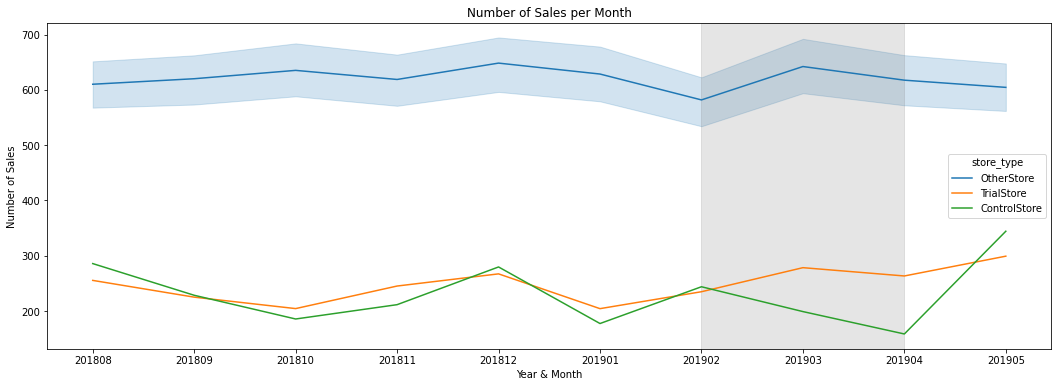

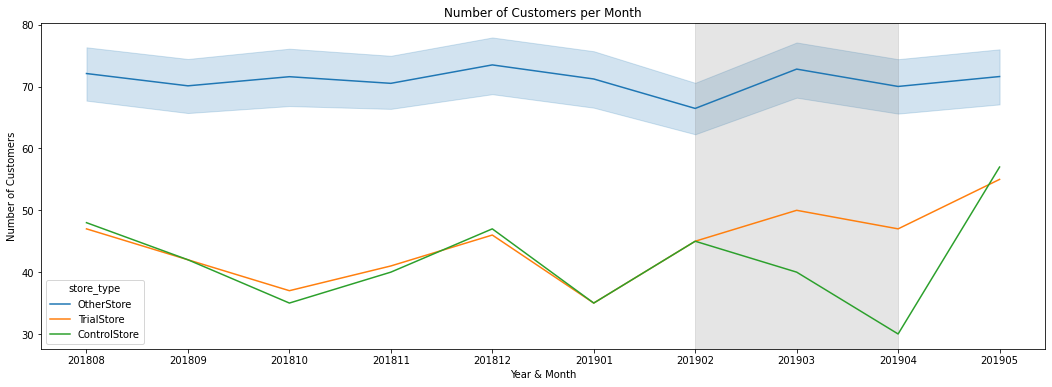

In [24]:
def sales_cust(val,Ylabel,show_title):
  plt.figure(figsize=(18,6))
  sns.lineplot(x = pretrial["ym_id"], y = pretrial[val], hue=pretrial["store_type"])
  plt.title(show_title)
  plt.xlabel("Year & Month")
  plt.ylabel(Ylabel)
  plt.axvspan(xmin="201902",xmax="201904", color = 'grey', alpha = 0.2)

  print()
  print()
  print()
  plt.show()
sales_cust("tot_sales","Number of Sales","Number of Sales per Month")
sales_cust("customer","Number of Customers","Number of Customers per Month")

The sales and customers were increased in the trial period when compared to the control store

# **Selecting Control Store for Trial Store 86**

In [25]:
cor_sales = cal_corr(pretrial, "tot_sales", 86,"store_nbr")
mag_sales = cal_std_mag(pretrial, "tot_sales", 86,"store_nbr")

cor_customer  = cal_corr(pretrial, "customer", 86, "store_nbr")
mag_customer  = cal_std_mag(pretrial, "customer",86, "store_nbr")

##### **Getting Total Sales Values**


In [26]:
comb_score = pd.merge(cor_sales,mag_sales[["Magnitude","nStores"]],on="nStores",how="right")
comb_score.head()

,Trail Store,nStores,Correlation,Magnitude
0,86.0,1.0,0.303665,0.588107
1,86.0,2.0,-0.034407,0.431178
2,86.0,3.0,0.180132,0.616113
3,86.0,4.0,-0.210100,0.555185
4,86.0,5.0,-0.251403,0.658143


Calculating the average measure

In [27]:
#0.5 is nothing but a threshold 
comb_score["avg_sales_measure"] = 0.5 * comb_score["Correlation"] + 0.5 * comb_score["Magnitude"]
Sales_avg_measure = comb_score.sort_values(by = "avg_sales_measure",ascending=False,ignore_index=True)
Sales_avg_measure.head()

,Trail Store,nStores,Correlation,Magnitude,avg_sales_measure
0,86.0,109.0,0.628404,0.701223,0.664813
1,86.0,106.0,0.508692,0.784244,0.646468
2,86.0,231.0,0.652169,0.616724,0.634447
3,86.0,181.0,0.696928,0.528323,0.612626
4,86.0,88.0,0.605880,0.613515,0.609697


##### **Getting Customer Values**

In [28]:
Mcomb_score = pd.merge(cor_customer,mag_customer[["Magnitude","nStores"]],on="nStores",how="right")
Mcomb_score.head()

,Trail Store,nStores,Correlation,Magnitude
0,86.0,1.0,0.379673,0.476923
1,86.0,2.0,0.087526,0.559259
2,86.0,3.0,0.012491,0.588235
3,86.0,4.0,-0.299560,0.630769
4,86.0,5.0,-0.602681,0.619355


Calculating the Average Measure

In [29]:
Mcomb_score["avg_cust_measure"] = 0.5 * Mcomb_score["Correlation"] + 0.5 * Mcomb_score["Magnitude"]
Cstmr_avg_measure = Mcomb_score.sort_values(by = "avg_cust_measure",ascending=False,ignore_index=True)
Cstmr_avg_measure.head()

,Trail Store,nStores,Correlation,Magnitude,avg_cust_measure
0,86.0,176.0,0.842257,0.609091,0.725674
1,86.0,229.0,0.779697,0.627273,0.703485
2,86.0,99.0,0.742352,0.541176,0.641764
3,86.0,188.0,0.620453,0.631250,0.625851
4,86.0,222.0,0.591625,0.656250,0.623937


###### **Getting Final Control Score**

In [30]:
control_stores = pd.merge(Sales_avg_measure[["Trail Store","nStores","avg_sales_measure"]],Cstmr_avg_measure[["nStores","avg_cust_measure"]],on="nStores",how="right")
control_stores.head()

,Trail Store,nStores,avg_sales_measure,avg_cust_measure
0,86.0,176.0,0.556841,0.725674
1,86.0,229.0,0.576517,0.703485
2,86.0,99.0,0.577133,0.641764
3,86.0,188.0,0.483052,0.625851
4,86.0,222.0,0.556366,0.623937


In [31]:
control_stores["final_score"] = 0.5 * control_stores["avg_sales_measure"] + 0.5 * control_stores["avg_cust_measure"]
control_stores = control_stores.sort_values(by="final_score", ascending = False,ignore_index=True)
control_stores.head()

,Trail Store,nStores,avg_sales_measure,avg_cust_measure,final_score
0,86.0,176.0,0.556841,0.725674,0.641257
1,86.0,229.0,0.576517,0.703485,0.640001
2,86.0,109.0,0.664813,0.611277,0.638045
3,86.0,99.0,0.577133,0.641764,0.609449
4,86.0,64.0,0.566553,0.623336,0.594945


### **The Control Store for Trial Store 86 is Store Number 176**

##### **Visualizing The Number of Sales and Customers Per Month for Control Store 176 & Trial Store 86**

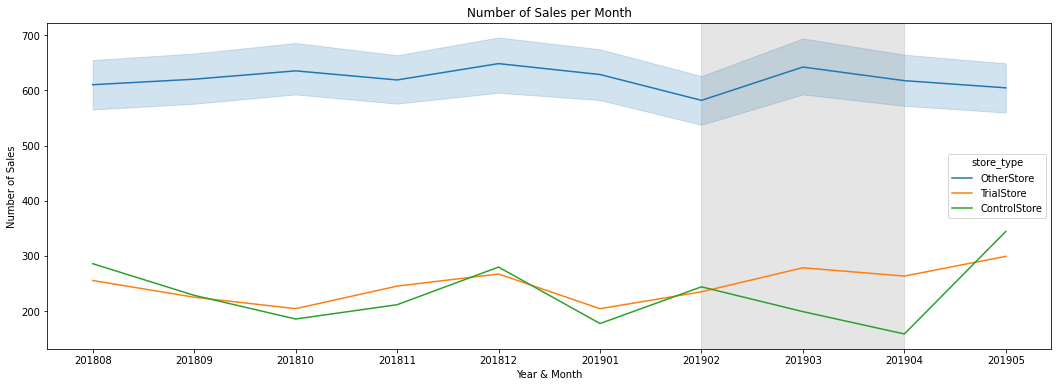

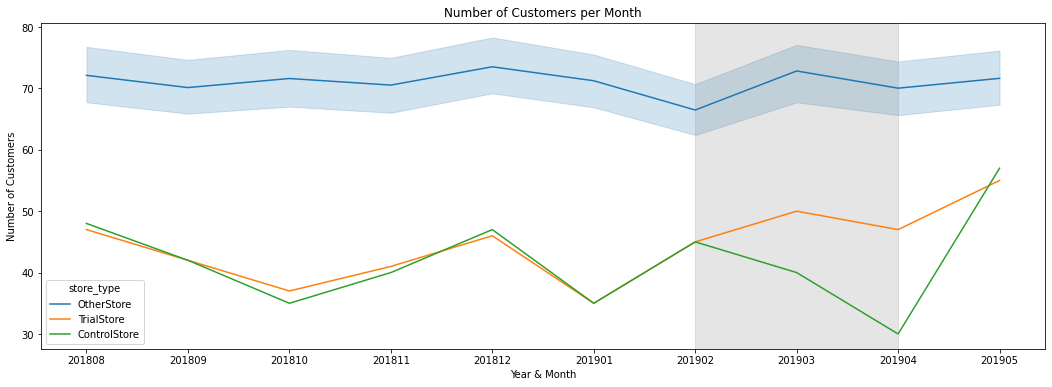

In [32]:
sales_cust("tot_sales","Number of Sales","Number of Sales per Month")
sales_cust("customer","Number of Customers","Number of Customers per Month")

The sales and customers were increased in the trial period when compared to the control store

# **Selecting Control Store for Trial Store 88**

In [ ]:
cor_sales = cal_corr(pretrial, "tot_sales", 88,"store_nbr")
mag_sales = cal_std_mag(pretrial, "tot_sales", 88,"store_nbr")

cor_customer  = cal_corr(pretrial, "customer", 88, "store_nbr")
mag_customer  = cal_std_mag(pretrial, "customer",88, "store_nbr")

##### **Getting Total Sales Values**


In [ ]:
comb_score = pd.merge(cor_sales,mag_sales[["Magnitude","nStores"]],on="nStores",how="right")
comb_score.head()

Calculating the average measure

In [ ]:
#0.5 is nothing but a threshold 
comb_score["avg_sales_measure"] = 0.5 * comb_score["Correlation"] + 0.5 * comb_score["Magnitude"]
Sales_avg_measure = comb_score.sort_values(by = "avg_sales_measure",ascending=False,ignore_index=True)
Sales_avg_measure.head()

##### **Getting Customer Values**

In [ ]:
Mcomb_score = pd.merge(cor_customer,mag_customer[["Magnitude","nStores"]],on="nStores",how="right")
Mcomb_score.head()

Calculating the Average Measure

In [ ]:
Mcomb_score["avg_cust_measure"] = 0.5 * Mcomb_score["Correlation"] + 0.5 * Mcomb_score["Magnitude"]
Cstmr_avg_measure = Mcomb_score.sort_values(by = "avg_cust_measure",ascending=False,ignore_index=True)
Cstmr_avg_measure.head()

###### **Getting Final Control Score**

In [ ]:
control_stores = pd.merge(Sales_avg_measure[["Trail Store","nStores","avg_sales_measure"]],Cstmr_avg_measure[["nStores","avg_cust_measure"]],on="nStores",how="right")
control_stores.head()

In [ ]:
control_stores["final_score"] = 0.5 * control_stores["avg_sales_measure"] + 0.5 * control_stores["avg_cust_measure"]
control_stores = control_stores.sort_values(by="final_score", ascending = False,ignore_index=True)
control_stores.head()

### **The Control Store for Trial Store 88 is Store Number 188**

##### **Visualizing The Number of Sales and Customers Per Month for Control Store 188 & Trial Store 88**

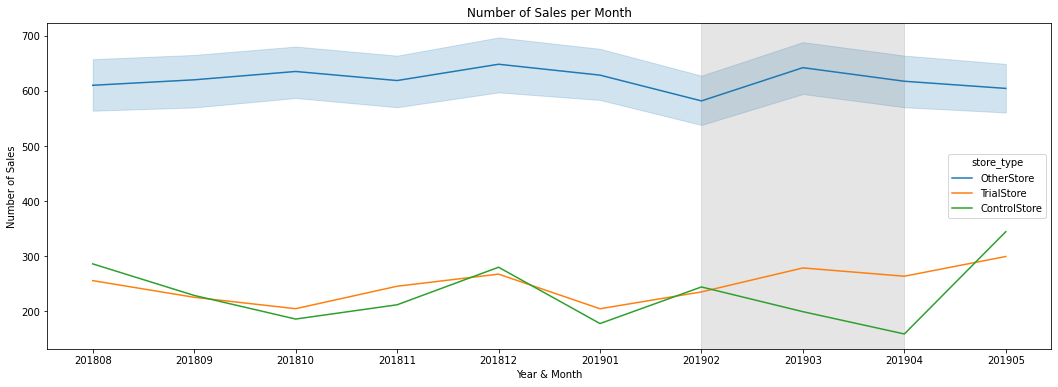

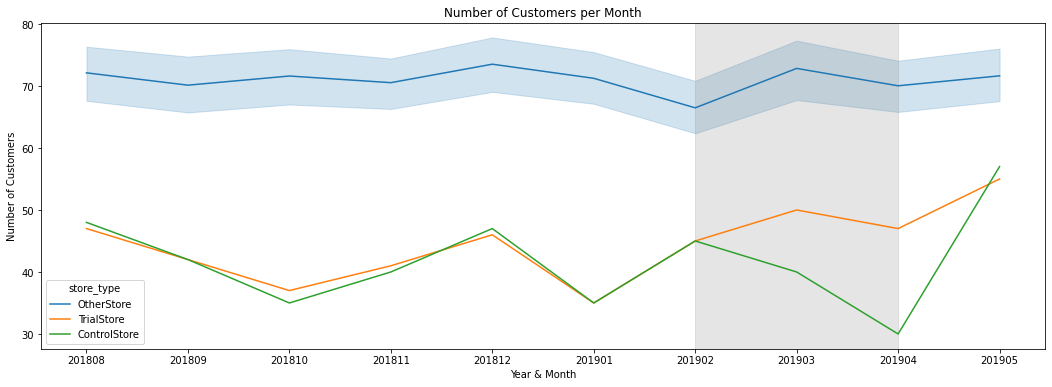

In [43]:
sales_cust("tot_sales","Number of Sales","Number of Sales per Month")
sales_cust("customer","Number of Customers","Number of Customers per Month")

The sales and customers were increased in the trial period when compared to the control store


# **Conlcution:**

The new trial layouts has a huge impact on the customers and sales section the Category chip manager can implement the new layout in the other stores. When compared to the customers visits the sales were some what less. So the manager can provide some discounts for certian products of chips which were performing low.

# **Thank You**